# impoart

In [2]:
import import_ipynb
import MaskRCNN_VOC as mrv
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

import bbox_visualizer as bbv

importing Jupyter notebook from MaskRCNN_VOC.ipynb


# Device

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# Dataset (Pascal VOC 2012)

In [4]:

transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
#     torchvision.transforms.Resize([100, 100])
    
])
target_transforms = torchvision.transforms.Compose([
])

dataset = mrv.VOC_Dataset(root = "/home", image_set = "train")
data_loader = mrv.VOC_Dataloader(dataset, batch_size = 10, shuffle = True)

# Model

In [5]:
# model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model = torchvision.models.detection.maskrcnn_resnet50_fpn_v2(pretrained=True)
model.roi_heads.box_predictor.cls_score = torch.nn.Linear(in_features=1024, out_features=21, bias=True)
model.roi_heads.box_predictor.bbox_pred = torch.nn.Linear(in_features=1024, out_features=84, bias=True)
model.roi_heads.mask_predictor.mask_fcn_logits = torch.nn.Conv2d(256, 21, kernel_size=(1, 1), stride=(1, 1))
model.to(device)
print()

/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
epoch = 3
for e in range(epoch):
    params = [p for p in model.parameters() if p.requires_grad]
    optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

    avg_loss = mrv.train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq = 10)
    print(avg_loss)

tensor(0.0530, grad_fn=<ToCopyBackward0>)
tensor(0.0522, grad_fn=<ToCopyBackward0>)
tensor(0.0515, grad_fn=<ToCopyBackward0>)


In [9]:
model.eval()
images, targets = next(iter(data_loader))
images = list(image.to(device) for image in images)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
result = model(images, targets)

In [10]:
targets[1]["boxes"]

tensor([[302,  54, 322,  70],
        [ 96,  98, 208, 160],
        [  1,   1, 112,  62]], device='cuda:0', dtype=torch.int32)

In [11]:
result[1]["labels"]

tensor([ 4, 15, 15], device='cuda:0')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


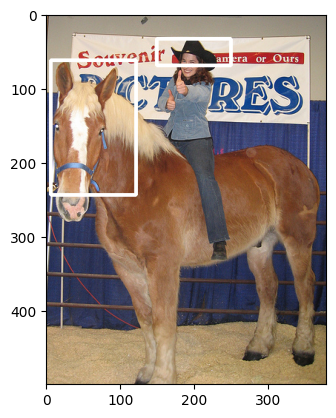

In [14]:
idx = 2
image = np.array(images[idx].to("cpu")).transpose((1, 2, 0))
boxes = result[idx]["boxes"].to("cpu").type(torch.uint8).tolist()
# boxes = targets[2]["boxes"].tolist()
image = bbv.draw_multiple_rectangles(image, boxes)
plt.imshow(image)

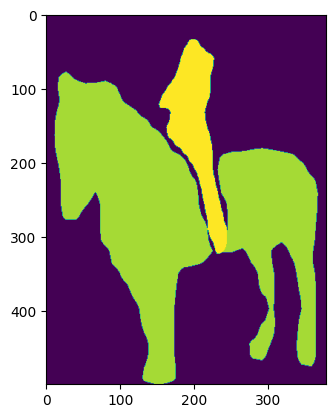

In [15]:
result[idx]["masks"].shape
masks = (result[idx]["masks"]>0.51).type(torch.uint8)
labels = result[idx]["labels"].reshape((-1, 1, 1, 1))

mask_image =(masks *labels).max(0)[0]
mask_image = np.array(mask_image.to("cpu")).transpose((1, 2, 0))
plt.imshow(mask_image)

# (result[0]["masks"].max(1)[0]*255).type(torch.uint8)

In [19]:
import MaskRCNN_VOC as m

In [20]:
d = mrv.VOC_Dataset(root = "/home", image_set = "train")

In [8]:
torch.save(model.state_dict(), "my_trained_model")

In [6]:
model.load_state_dict(torch.load("my_trained_model"))

<All keys matched successfully>

In [16]:
model

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         